In [8]:
import pandas as pd

# Function to load and parse the training data
def load_train_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            # Split each line by ":::" and strip any leading/trailing whitespace
            parts = [part.strip() for part in line.split(':::')]
            data.append(parts)
    
    # Create a DataFrame
    df_train = pd.DataFrame(data, columns=['ID', 'Title', 'Genre', 'Description'])
    return df_train

# Function to load and parse the test data
def load_test_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            # Split each line by ":::" and strip any leading/trailing whitespace
            parts = [part.strip() for part in line.split(':::')]
            
            data.append(parts)
    
    # Create a DataFrame
    df_test = pd.DataFrame(data, columns=['ID', 'Title', 'Description'])
    return df_test

# Assuming your text files are named 'train.txt' and 'test.txt' and are located in the current directory

df_train = load_train_data('train_data.txt')
df_test = load_test_data('test_data.txt')

# Display the first few rows of each DataFrame to verify everything loaded correctly
print("Train Data:")
print(df_train.head())
print("\nTest Data:")
print(df_test.head())


Train Data:
  ID                             Title     Genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

Test Data:
  ID                        Title  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  


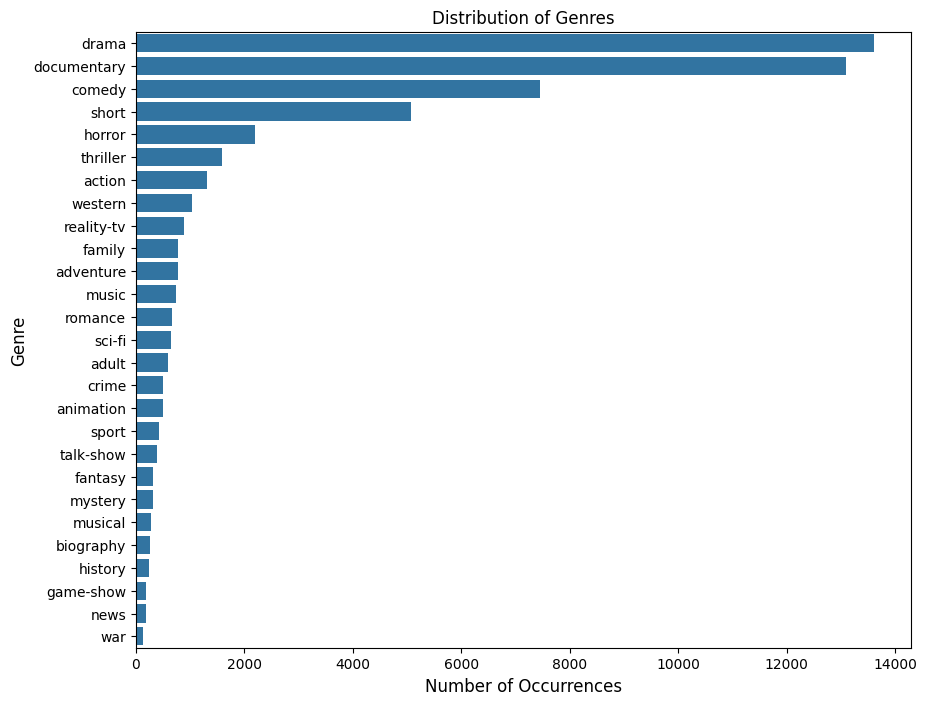

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre Distribution
plt.figure(figsize=(10,8))
sns.countplot(y='Genre', data=df_train, order = df_train['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


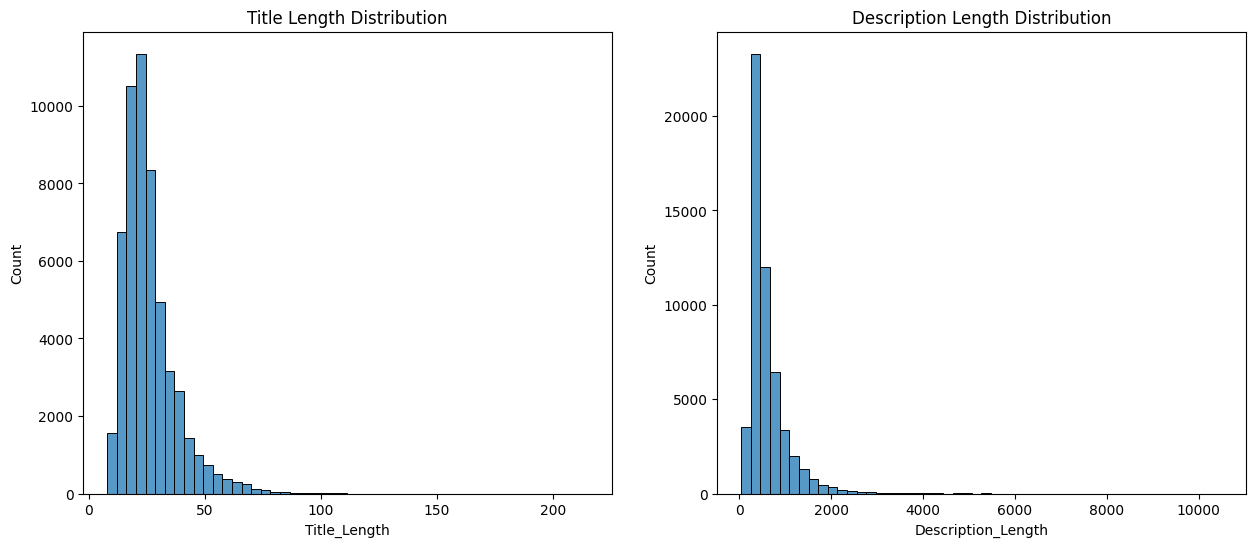

In [37]:
# Calculate the length of each document for Title and Description
df_train['Title_Length'] = df_train['Title'].apply(len)
df_train['Description_Length'] = df_train['Description'].apply(len)

# Plot histograms for Title and Description lengths
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['Title_Length'], bins=50)
plt.title('Title Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_train['Description_Length'], bins=50)
plt.title('Description Length Distribution')

plt.show()


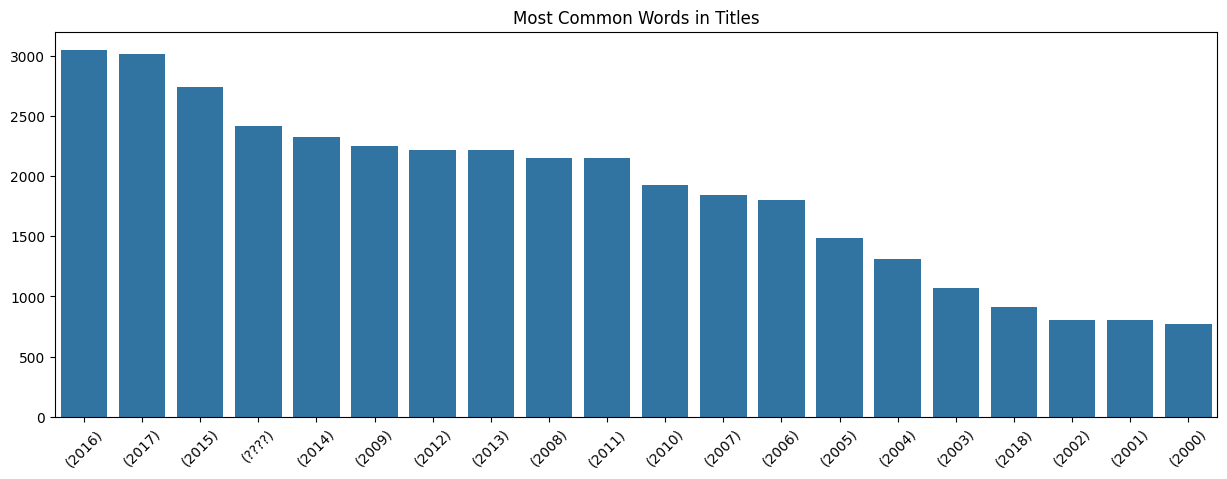

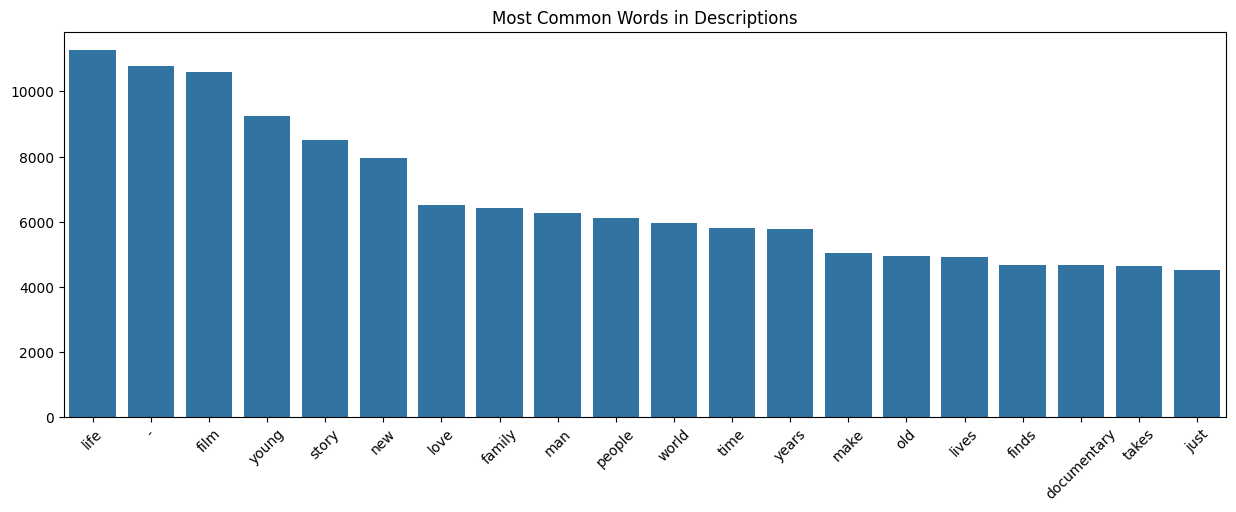

In [38]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Combine all the titles and descriptions
all_titles = ' '.join(df_train['Title'].values)
all_descriptions = ' '.join(df_train['Description'].values)

# Remove stopwords
all_titles = [word for word in all_titles.split() if word.lower() not in ENGLISH_STOP_WORDS]
all_descriptions = [word for word in all_descriptions.split() if word.lower() not in ENGLISH_STOP_WORDS]

# Get the most common words in Titles and Descriptions
common_words_titles = Counter(all_titles).most_common(20)
common_words_descriptions = Counter(all_descriptions).most_common(20)

# Plot common words
plt.figure(figsize=(15, 5))
sns.barplot(x=[word[0] for word in common_words_titles], y=[word[1] for word in common_words_titles])
plt.title('Most Common Words in Titles')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 5))
sns.barplot(x=[word[0] for word in common_words_descriptions], y=[word[1] for word in common_words_descriptions])
plt.title('Most Common Words in Descriptions')
plt.xticks(rotation=45)
plt.show()


In [40]:
!pip install textblob

                                              0.0/626.3 kB ? eta -:--:--
     --                                      41.0/626.3 kB 1.9 MB/s eta 0:00:01
     ------                                 112.6/626.3 kB 1.1 MB/s eta 0:00:01
     --------                               143.4/626.3 kB 1.1 MB/s eta 0:00:01
     ----------------                       276.5/626.3 kB 1.5 MB/s eta 0:00:01
     ------------------------               409.6/626.3 kB 1.6 MB/s eta 0:00:01
     ----------------------------------     573.4/626.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     ----                                     0.2/1.5 MB 5.3 MB/s eta 0:00:01
     -------                                  0.3/1.5 MB 4.5 MB/s eta 0:00:01
     -----------                              0.5/1.5 MB 4.0 MB/s eta 0:00:01
     -----------                              0.5/1.5 MB 4.0 M


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


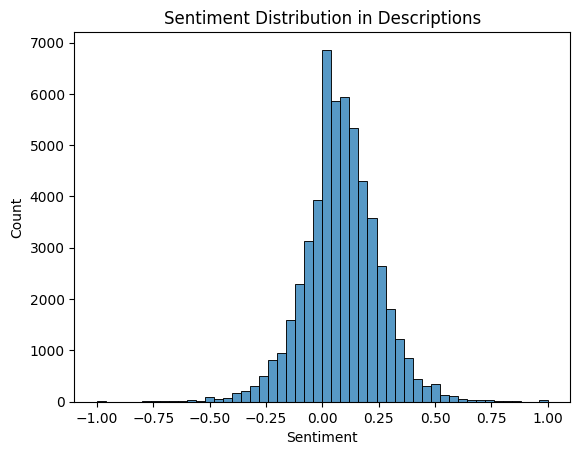

In [42]:
#sentiment analysis
# from textblob import TextBlob

# Function to get the sentiment of a text
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply function to get sentiment for each description
df_train['Sentiment'] = df_train['Description'].apply(get_sentiment)

# Plot sentiment distribution
sns.histplot(df_train['Sentiment'], bins=50)
plt.title('Sentiment Distribution in Descriptions')
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the data into train and validation sets
train_data, validation_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Optional: Display the first few rows of each split to verify
print("Train Data Sample:")
print(train_data.head())
print("\nValidation Data Sample:")
print(validation_data.head())

Train Data Sample:
          ID                                              Title        Genre  \
19253  19254                                     "Shade" (????)        drama   
12261  12262                                   Scarecrow (2016)        drama   
37143  37144  Larry Wilmore's Race, Religion & Sex in Florid...  documentary   
21965  21966                               Dear Mr. Gore (2009)  documentary   
7033    7034                               "Reinikainen" (1982)       comedy   

                                             Description  
19253  Sex. Betrayal. Seduction. Manipulation. Addict...  
12261  Autistic teen, Tony and his friendship with Ca...  
37143  The one-hour special examines this socially, e...  
21965  This personal narrative documentary uses my bi...  
7033   The easy-going village policeman Artturi Sakar...  

Validation Data Sample:
          ID                                   Title   Genre  \
5089    5090                       Sisterhood (2008)  com

In [18]:
print(df_train.columns)  # Verifying Column Names


Index(['ID', 'Title', 'Genre', 'Description', 'text_data'], dtype='object')


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Assuming 'Title' and 'Description' are the text columns we want to vectorize
# Initialize the TfidfVectorizer for both 'Title' and 'Description'
title_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
description_vectorizer = TfidfVectorizer(max_features=10000) # Adjust max_features as needed


# Fit the vectorizer on the training data and transform the training data
title_train_tfidf = title_vectorizer.fit_transform(train_data['Title'])
description_train_tfidf = description_vectorizer.fit_transform(train_data['Description'])


# Transform the validation data using the same vectorizer
title_validation_tfidf = title_vectorizer.transform(validation_data['Title'])
description_validation_tfidf = description_vectorizer.transform(validation_data['Description'])


# Combine the title and description TF-IDF features into one set for training
train_tfidf = hstack([title_train_tfidf, description_train_tfidf])

# Combine the title and description TF-IDF features into one set for validation
validation_tfidf = hstack([title_validation_tfidf, description_validation_tfidf])

# Now you have train_tfidf and validation_tfidf ready for training and validation in a machine learning model


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(train_tfidf, train_data['Genre'])  # Use the 'Genre' column of train_data as the target

# Predict and evaluate the model
y_pred_nb = nb_classifier.predict(validation_tfidf)  # Use the validation_tfidf for prediction
print('Naive Bayes Accuracy:', accuracy_score(validation_data['Genre'], y_pred_nb))  # Use the 'Genre' column of validation_data as the true labels


Naive Bayes Accuracy: 0.5143410495250392


In [29]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_logreg = logreg_classifier.predict(validation_tfidf)
print('Logistic Regression Accuracy:', accuracy_score(validation_data['Genre'], y_pred_logreg))


Logistic Regression Accuracy: 0.596975006916905


In [30]:
from sklearn.svm import LinearSVC

# Train an SVM classifier
svm_classifier = LinearSVC(max_iter=1000)
svm_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_svm = svm_classifier.predict(validation_tfidf)
print('SVM Accuracy:', accuracy_score(validation_data['Genre'], y_pred_svm))


c:\Users\Likitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.5705063174398229


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_rf = rf_classifier.predict(validation_tfidf)
print('Random Forest Accuracy:', accuracy_score(validation_data['Genre'], y_pred_rf))


Random Forest Accuracy: 0.47560638199760213


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a GBM classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
gbm_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_gbm = gbm_classifier.predict(validation_tfidf)
print('Gradient Boosting Accuracy:', accuracy_score(validation_data['Genre'], y_pred_gbm))


Gradient Boosting Accuracy: 0.45411786405976207


In [45]:
# Vectorize the 'Title' and 'Description' columns of df_test as done for the training data
title_test_tfidf = title_vectorizer.transform(df_test['Title'])
description_test_tfidf = description_vectorizer.transform(df_test['Description'])

# Combine the vectorized Title and Description features
test_tfidf = hstack([title_test_tfidf, description_test_tfidf])

In [48]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(train_tfidf, train_data['Genre'])

# Predict and evaluate the model
y_pred_logreg = logreg_classifier.predict(test_tfidf)

In [50]:
y_pred_logreg


array(['drama', 'drama', 'documentary', ..., 'comedy', 'drama',
       'documentary'], dtype=object)